In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG','MSFT','F','GE']
yfin.pdr_override() #  you ensure compatibility with the Yahoo Finance API changes and possibly improve the reliability and functionality of data retrieval from Yahoo Finance within your code
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = pdr.get_data_yahoo(t, start="1995-1-1", end="2024-3-23")['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7357 entries, 1995-01-03 to 2024-03-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7357 non-null   float64
 1   MSFT    7357 non-null   float64
 2   F       7357 non-null   float64
 3   GE      7357 non-null   float64
dtypes: float64(4)
memory usage: 287.4 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.578554,2.327824,3.719225,25.478426
1995-01-04,7.517805,2.344746,3.819294,25.478426
1995-01-05,7.411496,2.306069,3.785934,25.540867
1995-01-06,7.426673,2.344746,3.785934,25.415968
1995-01-09,7.396307,2.330242,3.852648,25.166197


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2024-03-18,161.210007,417.320007,12.18,169.910004
2024-03-19,161.830002,421.410004,12.30,173.460007
2024-03-20,161.990005,425.230011,12.90,173.929993
2024-03-21,161.860001,429.369995,12.92,176.639999
2024-03-22,161.660004,428.739990,12.91,175.149994


In [6]:
mydata.iloc[0]

PG       7.578554
MSFT     2.327824
F        3.719225
GE      25.478426
Name: 1995-01-03 00:00:00, dtype: float64

In [7]:
simple_return = (mydata/mydata.shift(1)) - 1
simple_return

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002048,0.016772,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017621,-0.009827
...,...,...,...,...
2024-03-18,-0.001053,0.002161,0.009950,0.006039
2024-03-19,0.003846,0.009801,0.009852,0.020893
2024-03-20,0.000989,0.009065,0.048780,0.002709


In [8]:
simple_return[np.isnan(simple_return)] = 0
simple_return

,PG,MSFT,F,GE
Date,,,,
1995-01-03,0.000000,0.000000,0.000000,0.000000
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002048,0.016772,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017621,-0.009827
...,...,...,...,...
2024-03-18,-0.001053,0.002161,0.009950,0.006039
2024-03-19,0.003846,0.009801,0.009852,0.020893
2024-03-20,0.000989,0.009065,0.048780,0.002709


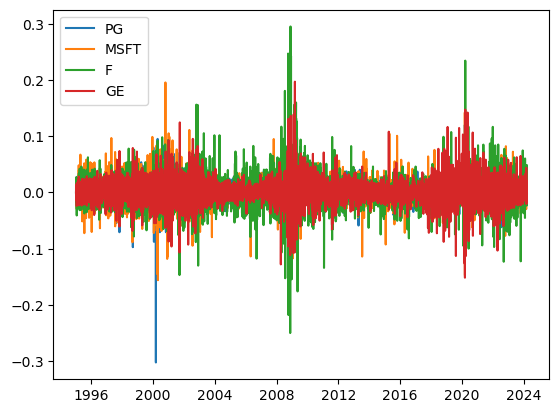

In [9]:
fig,ax = plt.subplots()
data_points = ax.plot(simple_return)
ax.legend( ['PG','MSFT','F','GE'])

In [10]:
annual_returns = np.average(simple_return,axis=0)*250

In [11]:
weight = np.array([0.25, 0.25, 0.25, 0.25])

In [12]:
annual_return = 100 * np.dot(annual_returns, weight) 
str = str(annual_return) + ' :average percent of return for the portfolio'
str

'14.82359871577861 :average percent of return for the portfolio'